# Tokenization, , lower,  stopword & digit & punctuation removal

read path:  all/labeledTrainData.tsv
            id  sentiment                                             review
24995   3453_3          0  It seems like more consideration has gone into...
24996   5064_1          0  I don't believe they made this film. Completel...
24997  10905_3          0  Guy is a loser. Can't get girls, needs to buil...
24998  10194_3          0  This 30 minute documentary Buñuel made in the ...
24999   8478_8          1  I saw this movie as a child and it broke my he...
load path:  tmp/labeledTraintoken.csv
count    25000.000000
mean       703.210240
std        546.984429
min         26.000000
25%        364.000000
50%        516.000000
75%        854.000000
max       8044.000000
Name: review, dtype: float64


,id,sentiment,review
24995,3453_3,0,It like consideration IMDb review film review ...
24996,5064_1,0,I believe make film Completely unnecessary The...
24997,10905_3,0,Guy loser girl need build pick strong successf...
24998,10194_3,0,This minute documentary Buñuel make early Spai...
24999,8478_8,1,I movie child break heart No story unfinished ...


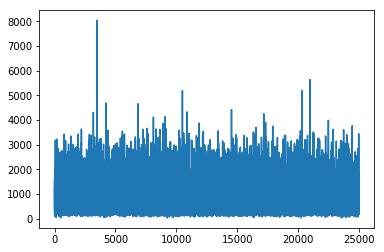

In [2]:
import pandas as pd
import numpy as np
import string
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords 

import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English

parser = English()

def text_preprocessing():
    col= 'review'
    
    def read_file(path_read_file):
        print("read path: ",path_read_file)
        df = pd.read_csv(path_read_file, sep = '\t', error_bad_lines=False )
        print(df.tail())
        return df

    def load_file(df, path_load_file):
        print("load path: ", path_load_file)
        df.to_csv(path_load_file)
        return df

    #sent = "I like statements that are both true and absurd. 12 I love you"
    def spacy_tokenizer(text):
        tokens = parser(text)
        #token, stopword removal, lower, digit removal,  punctuation removal
        tokens = [tok.lemma_.strip() if tok.lemma_ != "-PRON-" else tok.lower_ for tok in tokens]
        tokens = [tok for tok in tokens if (tok not in stopwords and tok not in string.punctuation) and tok.isalpha()]  
        return " ".join(tokens)

    def sentense_size_analysis(df):
        df_len = df[col].map(str).apply(len)
        df_len.plot()
        print( df_len.describe() )

    path_read_file= 'all/labeledTrainData.tsv'
    path_load_file= 'tmp/labeledTraintoken.csv'

    df= read_file(path_read_file)
    df[col] = df[col].apply(spacy_tokenizer)
    load_file(df, path_load_file)

    sentense_size_analysis(df)
    return df

df= text_preprocessing()   
df.tail()